# Introduction

This notebook explores an online retail dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Exploratory Data Analysis

In [2]:
#load data
retail_df = pd.read_excel("Online Retail.xlsx")

In [3]:
print("The shape of our data set is: ", retail_df.shape)

The shape of our data set is:  (541909, 8)


In [4]:
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
retail_df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


We need more information about the rows and columns

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The dataset is made of **541909** rows and **8** columns. 
There are some missing values in the **CustomerID** column as it only has **406829** values. The **Description** column is also missing a few values.

In [7]:
#explore values of the attributes
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products: ", retail_df['StockCode'].nunique())
print("Number of customers: ", retail_df['CustomerID'].nunique())
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df), 2), "%")
print("Number of countries: ", retail_df['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers:  4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Note:** The amount of NA customers is fairly large.

The dataframe contains **8** variables corresponding to:
* **InvoiceNo**: Transaction invoice number; **Nominal** *a 6-digit integral number uniquely assigned to every transaction, if it starts with a 'c' it indicates a cancellation*
* **StockCode**: Product code; **Nominal** *a 5-digit integral number uniquely assigned to each product*
* **Description**: Product name; **Nominal** 
* **Quantity**: Quantity of product per transaction; **Numeric**
* **InvoiceDate**: Date and time; **Numeric** *the day and time that each transaction occurred*
* **UnitPrice**: Unit price; **Numeric** *product price per unit*
* **CustomerID**: Customer number; **Nominal** *a 5-digit integral number uniquely assigned to each customer*
* **Country**: Country name; **Nominal** *name of the country where each customer resides*

Now, to look at the quantitative data

In [8]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Notice that there are some negative values. This could indicate a return or cancellation.
## 1.1 Verify Assumption: Cancelled invoices
As mentioned in the description of the dataset, an InvoiceNo that starts with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: **-80995**.

Let's look at the list of cancelled invoices and check if there is an invoice with that quantity.

In [9]:
#get cancelled transactions
cancelled = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [10]:
#search for transaction with quantity == -80995
cancelled[cancelled['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


As expected, the negative value is in the quantity column, meaning that it's a cancelled transaction because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

**How many cancelled orders are there?**

In [11]:
#check amount of rows of cancelled orders
print("We have ", len(cancelled), " cancelled orders.")
#percentage of cancellations
total_orders = retail_df['InvoiceNo'].nunique()
cancelled = len(cancelled)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled, total_orders, cancelled/total_orders*100))


We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


There is a large percentage of cancelled orders at 35%. To prevent further cancellations we can study the cancelled orders. 
Let's get an overview of a general customer's purchase behavior.

## 1.2 Explore Baskets/Orders
### 1.2.a What is the average number of orders per customer?

In [12]:
#get the InvoiceNo number per customer
customer_groupby = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
customer_groupby.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [13]:
customer_groupby.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer is **5**. We found in the descriptive statistics that customers buy in average a quantity of **10**. 

**Are they from the same product?** Let's examine how many products are purchased.
### 1.2.b What is the average number of unique items per order?

In [14]:
invoice_groupby = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
invoice_groupby.columns = ['productsNumber']
invoice_groupby.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [15]:
invoice_groupby.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [16]:
retail_df.groupby(['InvoiceNo', 'CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [17]:
temp = retail_df.groupby(['InvoiceNo', 'CustomerID'], as_index=False)['InvoiceDate'].count()
transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
transaction.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [18]:
transaction.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


Let's look at the distribution of productsNumber

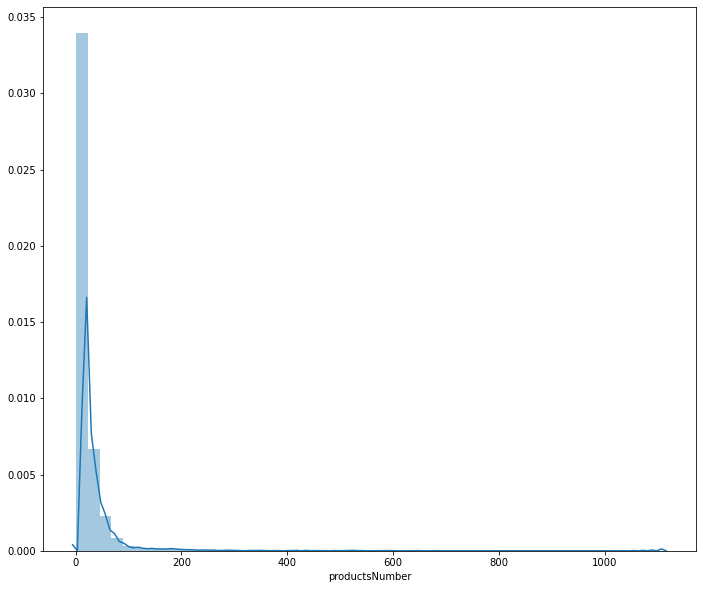

In [19]:
#Visualize the productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(invoice_groupby['productsNumber'], ax=ax)
plt.show()

**There is a skewed distribution of products.** Most people buy less than **25** products.
## Customers by Country

In [20]:
retail_df['TotalCost'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**What is the total revenue per country?**

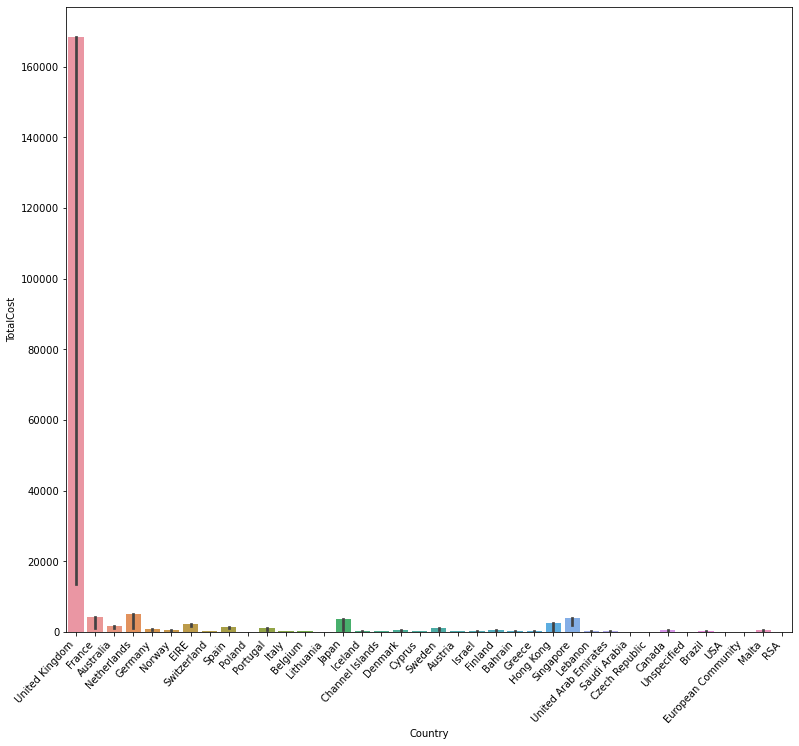

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax = sns.barplot(x='Country', y='TotalCost', data=retail_df, estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [22]:
retail_df.groupby('Country').sum().sort_values(by='TotalCost', ascending=False)

,Quantity,UnitPrice,CustomerID,TotalCost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05
Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05
Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04
Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


The UK has the largest market.

In [23]:
retail_df[retail_df['Country'] == 'United Kingdom']['CustomerID'].nunique()

3950

Not only are most sales revenue achieved in the UK, but most customers are also located in the UK. 
We will explore this to discover what products the customers buy together and the possible opportunities in the UK Market.

In [24]:
uk_retail = retail_df[retail_df['Country']=='United Kingdom']
uk_retail.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [25]:
print("Number of transactions:", uk_retail['InvoiceNo'].nunique())
print("Number of products bought:", uk_retail['StockCode'].nunique())
print("Number of customers:", uk_retail['CustomerID'].nunique())
print("Percentage of customers NA:", round(uk_retail['CustomerID'].isnull().sum()*100 / len(uk_retail),2), "%")
print("Number of countries:", uk_retail['Country'].nunique())

Number of transactions: 23494
Number of products bought: 4065
Number of customers: 3950
Percentage of customers NA: 26.96 %
Number of countries: 1


## Explore Quantity
**What products are most bought in the UK?** 

In [26]:
groupedProduct = uk_retail.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head()

,StockCode,Quantity
1068,22197,52928
2620,84077,48326
3655,85099B,43167
3666,85123A,36706
2733,84879,33519


In [27]:
invoice_quantity = uk_retail.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


To get to know more about the most bought products we would do a **"Market Basket Analysis"** to find which products tend to be purchased together and which are most susceptible to promotion.

# Market Basket Analysis

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [29]:
#Load dataset
#retail_df = pd.read_excel("Online Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Cleanup

In [30]:
#remove extra spaces
retail_df['Description'] = retail_df['Description'].str.strip()
#remove NA values
retail_df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
#remove cancelled orders
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
def create_basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
             .groupby(['InvoiceNo', 'Description'])['Quantity']
             .sum().unstack().reset_index().fillna(0)
             .set_index('InvoiceNo'))
    return basket

In [32]:
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets = basket_sets.astype(bool)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
frequent_items = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [33]:
# Generate rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)
# Keep only desired columns 
rules = rules[['antecedents', 'consequents', 'antecedent support', 'confidence', 'lift']]
# Rename column  
rules = rules.rename(columns={'antecedent support':'support'})
# Show first 5 rows
rules.head(5)

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.763158,7.478947
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.725000,7.478947
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.815789,8.642959
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.783784,7.681081


A customer is 7 times more likely to buy **ALARM CLOCK BAKELIKE GREEN** than an average customer (lift) if they buy **ALARM CLOCK BAKELIKE PINK**. This rule is "true" in 72.5% of the cases (confidence). This can be used as insight to recommend **ALARM CLOCK BAKELIKE GREEN** for those who bought the Pink one.

In [34]:
basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets = basket2_sets.astype(bool)
basket2_sets.drop('POSTAGE', inplace=True, axis=1)
frequent_items_germany = apriori(basket2_sets, min_support=0.05, use_colnames=True)

In [35]:
# Generate rules
rules = association_rules(frequent_items_germany, metric="lift", min_threshold=1.2)
# Keep only desired columns 
rules = rules[['antecedents', 'consequents', 'antecedent support', 'confidence', 'lift']]
# Rename column  
rules = rules.rename(columns={'antecedent support':'support'})
# Show first 5 rows
rules.head(5)

,antecedents,consequents,support,confidence,lift
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.584906,4.242887
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.492063,4.242887
2,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.115974,0.433962,2.754455
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.157549,0.319444,2.754455
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.490566,2.001685


A customer is 4 times more likely to buy **PLASTERS IN TIN WOODLAND ANIMALS** than an average customer (lift) if they buy **PLASTERS IN TIN CIRCUS PARADE**. This rule is "true" in 49% of the cases (confidence). This can be used as insight to recommend **PLASTERS IN TIN WOODLAND ANIMALS** for those who bought the Circus Parade ones.

At this point, we want to look at how much opportunity there is to use the popularity of one product to drive sales of another.

In [36]:
basket_uk = create_basket("United Kingdom")
basket3_sets = basket_uk.applymap(encode_units)
basket3_sets = basket3_sets.astype(bool)
basket3_sets.drop('POSTAGE', inplace=True, axis=1)
frequent_items_uk = apriori(basket3_sets, min_support=0.05, use_colnames=True)

In [37]:
# Generate rules
rules = association_rules(frequent_items_uk, metric="lift", min_threshold=1.2)
# Keep only desired columns 
rules = rules[['antecedents', 'consequents', 'antecedent support', 'confidence', 'lift']]
# Rename column  
rules = rules.rename(columns={'antecedent support':'support'})
# Show first 5 rows
rules.head(5)

,antecedents,consequents,support,confidence,lift


We didn't find any rules for United Kingdom customers, so we will try other filters.

In [38]:
retail_filtered = retail_df[retail_df['Country']=="United Kingdom"]

basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [39]:
basket4_sets = basket.applymap(encode_units)
basket4_sets = basket4_sets.astype(bool)
basket4_sets.drop('POSTAGE', inplace=True, axis=1)
frequent_items_uk = apriori(basket3_sets, min_support=0.03, use_colnames=True)

In [40]:
# Generate rules
rules = association_rules(frequent_items_uk, metric="lift", min_threshold=1.2)
# Keep only desired columns 
rules = rules[['antecedents', 'consequents', 'antecedent support', 'confidence', 'lift']]
# Rename column  
rules = rules.rename(columns={'antecedent support':'support'})
# Show first 5 rows
rules.head(5)

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049821,0.605376,12.900183
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046928,0.642694,12.900183
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.820768,16.403939
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050035,0.617773,16.403939
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051267,0.732497,14.639752


# Conclusion - Perspective
We arrived to distinguish some trends related to France's Market, Germany's Market, and the UK's Market which can be used to make recommendations for customers, by better understanding their preferences. 

I suggest categorizing the products via root words. For example, in the item **ALARM CLOCK BAKELIKE GREEN**, the root word be ***alarm*** as that is a more general category. We would use the generalized categories to cluster product purchases.